In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import mean 
dataset = pd.read_csv('salary_train.csv')
jobs = np.unique(np.array(dataset['job']))

columns_list=["algebra","programming","data science","robotics","economics", "job"]
X = pd.DataFrame(dataset, columns=columns_list)
#X = X.loc[X["job"]=="developer"]
Y = dataset[["salary","job"]]
#Y = Y.loc[Y["job"]=="developer"]
#Y.index=dataset['job']

def get_by_job(A):
    lis = list()
    for job in jobs:
        D = A.loc[A['job']==job]
        lis.append(D)
    return lis

X_by_job = get_by_job(X)
Y_by_job = get_by_job(Y)


sal_avg={}

for index, row in dataset.iterrows():
    job_id = row['job']
    sal = row['salary']
    if job_id not in sal_avg:
        sal_avg[job_id] = [sal]
    else:
        sal_avg[job_id].append(sal)
        
X_by_job

[      algebra  programming  data science  robotics  economics             job
 1          76           84            76        80         79  data scientist
 4          73           87            56        84         73  data scientist
 10         90           61            69        83         96  data scientist
 12         66           77            60        68         90  data scientist
 17         55           74            71        72         73  data scientist
 ...       ...          ...           ...       ...        ...             ...
 8967       58           80            80        50         60  data scientist
 8975       97           72            85        64         70  data scientist
 8991       69           70            89        53         54  data scientist
 8992       54           91            58        71         74  data scientist
 8999       82           55            82        65         88  data scientist
 
 [1478 rows x 6 columns],
       algebra  programm

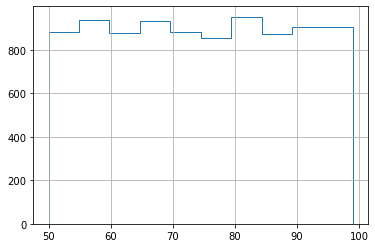

In [76]:
dataset['algebra'].hist(histtype='step')


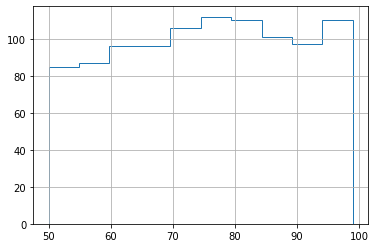

In [19]:
dataset['programming'].hist(histtype='step')


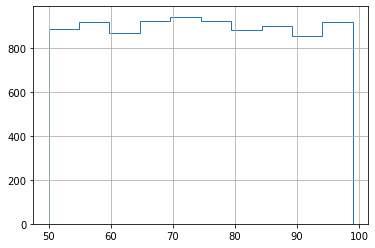

In [139]:
dataset['robotics'].hist(histtype='step')


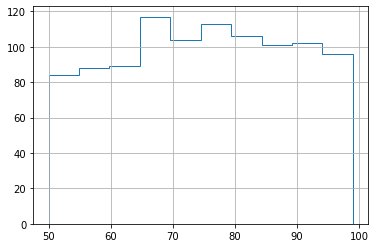

In [17]:
dataset['data science'].hist(histtype='step')


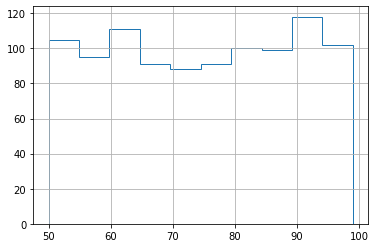

In [18]:
dataset['economics'].hist(histtype='step')


In [474]:

predict_dataset = pd.read_csv('salary_predict.csv')
X_predict = pd.DataFrame(predict_dataset, columns=columns_list)
pr_list = get_by_job(X_predict)
pr_list

[     algebra  programming  data science  robotics  economics             job
 12        91           79            97        89         55  data scientist
 21        86           68            61        93         61  data scientist
 25        62           91            52        79         99  data scientist
 29        82           86            69        97         72  data scientist
 30        92           87            73        73         73  data scientist
 ..       ...          ...           ...       ...        ...             ...
 970       91           58            68        66         81  data scientist
 973       55           57            54        67         77  data scientist
 980       87           85            69        79         60  data scientist
 986       89           62            73        86         65  data scientist
 999       54           92            53        96         55  data scientist
 
 [177 rows x 6 columns],
      algebra  programming  data scie

In [479]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
first=1

Y_map = {}
def remove_job_column(A):
    return A.loc[:,A.columns!='job']
for (x,y,x_pred) in zip(X_by_job,Y_by_job, pr_list):
    
    x = remove_job_column(x)
    y = remove_job_column(y)
    x_pred = remove_job_column(x_pred)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    
    y_pred = regressor.predict(x_pred)
    for id, sal in zip(x_pred.index,y_pred):
        Y_map[id]=sal[0]
    
    if not first:
        first=1
        x_plt = X_train['algebra']
        plt.scatter(x_plt, Y_train, color = 'red')
        x22 = x_pred['algebra']
        plt.plot(x22, regressor.predict(x_pred), color = 'blue')
        plt.show()
        
    
    #for i in range(len(X_test)):
#    print(i,X_test.values[i])
#print(Y_map[0])
Y_map = {k+9000: int(round(v)) for k, v in sorted(Y_map.items(), key=lambda item: item[0])}
for k,v in Y_map.items():
    if v>= 1000000:
        Y_map[k]=1000000

print(Y_map)
res = pd.DataFrame(Y_map.items(),columns=['Id','salary'])
#res = pd.DataFrame(Y_map.values(),columns=['Salary'])
#res.index = Y_map.keys()

res.to_csv (r'output.csv', index = False, header=True)

{9000: 726216, 9001: 560880, 9002: 331607, 9003: 1000000, 9004: 143429, 9005: 424947, 9006: 111408, 9007: 149906, 9008: 352493, 9009: 430967, 9010: 152577, 9011: 912205, 9012: 884629, 9013: 894979, 9014: 928681, 9015: 495041, 9016: 150944, 9017: 404144, 9018: 386122, 9019: 493157, 9020: 336458, 9021: 731250, 9022: 400865, 9023: 662996, 9024: 885526, 9025: 814034, 9026: 931984, 9027: 952301, 9028: 182136, 9029: 855796, 9030: 887471, 9031: 515481, 9032: 116612, 9033: 610436, 9034: 347896, 9035: 275752, 9036: 503932, 9037: 359160, 9038: 407784, 9039: 289903, 9040: 983280, 9041: 960372, 9042: 490703, 9043: 153579, 9044: 436592, 9045: 399687, 9046: 513457, 9047: 1000000, 9048: 926078, 9049: 830297, 9050: 579442, 9051: 126261, 9052: 151389, 9053: 194023, 9054: 514394, 9055: 274149, 9056: 390241, 9057: 335559, 9058: 338358, 9059: 289926, 9060: 512103, 9061: 972720, 9062: 247433, 9063: 313022, 9064: 940350, 9065: 677933, 9066: 127196, 9067: 380046, 9068: 394174, 9069: 506980, 9070: 135557, 907

ValueError: x and y must be the same size

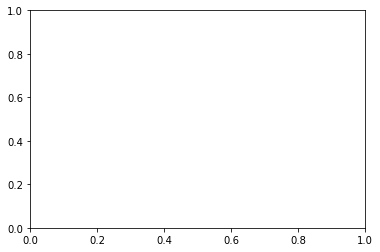

In [355]:


plt.scatter(x_plt, Y_train, color = 'red')
plt.plot(x_plt, regressor.predict(X_train), color = 'blue')
plt.title('labbrava')
plt.xlabel('many features')
plt.ylabel('Salary')
plt.show()

# Visualizing the Test Set Results
plt.scatter(x_plt, Y_test, color = 'red')
plt.plot(x_plt, regressor.predict(x_plt), color = 'blue')
plt.title('titttttle')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()